In [1]:
import sklearn.tree

In [2]:
import pandas

In [3]:
df = pandas.read_csv('phonecase.csv')
df

,Age,Income,Colour
0,12,0,Red
1,14,10,Red
2,15,0,Red
3,17,500,Yellow
4,18,10000,Red
5,19,30000,Yellow
6,21,0,Yellow
7,21,20000,Yellow
8,23,30000,Yellow
9,25,40000,Pink


In [4]:
dtc = sklearn.tree.DecisionTreeClassifier(criterion='gini',
                                         max_depth=4)

In [5]:
dtc.fit(df[['Age', 'Income']],
        df.Colour
       )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
dtc.predict([ [10,0]   ,   [70,100000000]    ])

array(['Red', 'Pink'], dtype=object)

In [7]:
sklearn.tree.export_graphviz(dtc, 'tree1.dot')

In [8]:
import io

In [9]:
s = io.StringIO()

In [10]:
sklearn.tree.export_graphviz(dtc, out_file=s,
                            feature_names=['AGE', 'Annual Income'])

In [11]:
s.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="AGE <= 24.0\\ngini = 0.667\\nsamples = 18\\nvalue = [6, 6, 6]"] ;\n1 [label="AGE <= 18.5\\ngini = 0.494\\nsamples = 9\\nvalue = [0, 4, 5]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Annual Income <= 255.0\\ngini = 0.32\\nsamples = 5\\nvalue = [0, 4, 1]"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3, 0]"] ;\n2 -> 3 ;\n4 [label="Annual Income <= 5250.0\\ngini = 0.5\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n2 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 0, 4]"] ;\n1 -> 7 ;\n8 [label="Annual Income <= 90000.0\\ngini = 0.494\\nsamples = 9\\nvalue = [6, 2, 1]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="AGE <= 51.5\\ngini = 0.278\\nsamples = 6\\nvalue = [5, 0, 1]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 3

In [12]:
import pydot

In [13]:
graph = pydot.graph_from_dot_data(s.getvalue())

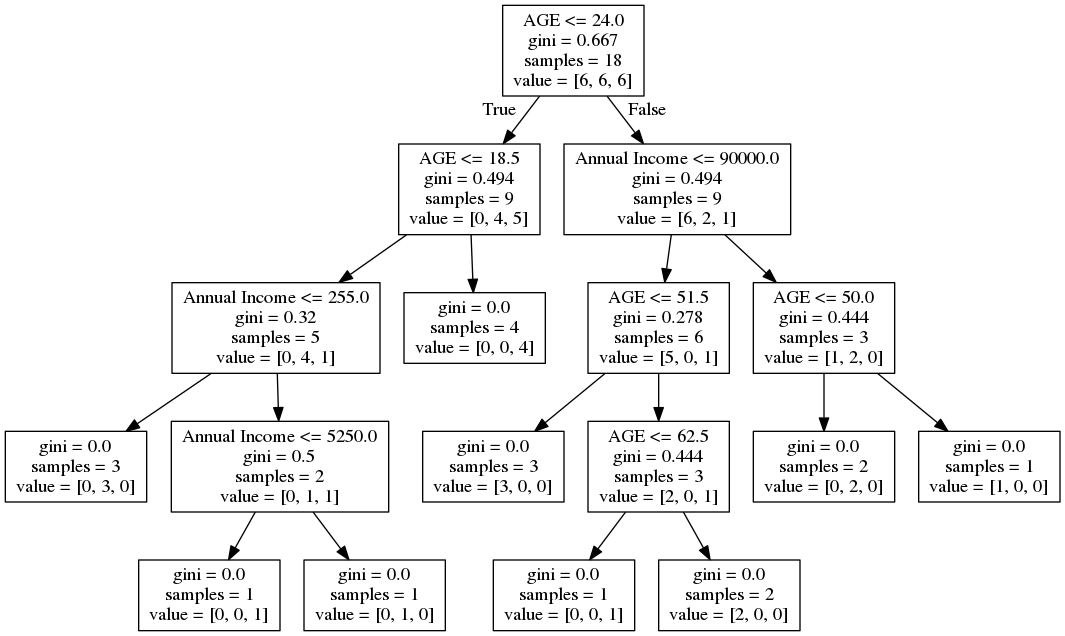

In [14]:
import IPython.display
IPython.display.Image(graph[0].create_png())

In [15]:
dtc.feature_importances_

array([0.7462963, 0.2537037])